# Hands-On Tutorial: Automated Predictive (APL) in SAP HANA Cloud
## Data exploration
https://blogs.sap.com/2020/07/27/hands-on-tutorial-automated-predictive-apl-in-sap-hana-cloud/

In [1]:
import hana_ml
print(hana_ml.__version__)

2.18.23092701


### Connect to SAP HANA Cloud

In [2]:
import hana_ml.dataframe as dataframe
conn = dataframe.ConnectionContext(userkey = 'MYHANACLOUD',
                                   encrypt = 'true')
conn.connection.isconnected()

True

### Explore the data

Point to the data in SAP HANA Cloud, ie by table name

In [3]:
df_remote = conn.table(table = 'BANKMARKETING').sort('CUSTOMER_ID', desc = False)
df_remote.head(5).collect()

,CUSTOMER_ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,PURCHASE
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


Alternatively, point to the data in SAP HANA Cloud by specifying a SELECT statement of your choice

In [4]:
df_remote = conn.sql('SELECT * FROM BANKMARKETING ORDER BY "CUSTOMER_ID" ASC')
df_remote.head(5).collect()

,CUSTOMER_ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,PURCHASE
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


Count the number of rows in the hana_ml Dataframe, which points to the data in SAP HANA Cloud

In [5]:
df_remote.count()

45211

What are the column names and types

In [6]:
df_remote.dtypes()

[('CUSTOMER_ID', 'INT', 10, 10, 10, 0),
 ('AGE', 'INT', 10, 10, 10, 0),
 ('JOB', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('MARITAL', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('EDUCATION', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('DEFAULT', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('BALANCE', 'INT', 10, 10, 10, 0),
 ('HOUSING', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('LOAN', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('CONTACT', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('DAY', 'INT', 10, 10, 10, 0),
 ('MONTH', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('CAMPAIGN', 'INT', 10, 10, 10, 0),
 ('PDAYS', 'INT', 10, 10, 10, 0),
 ('PREVIOUS', 'INT', 10, 10, 10, 0),
 ('POUTCOME', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('PURCHASE', 'NVARCHAR', 5000, 5000, 5000, 0)]

Get insight into the column content

In [7]:
df_remote.describe().collect()

,column,count,unique,nulls,mean,std,min,max,median,25_percent_cont,25_percent_disc,50_percent_cont,50_percent_disc,75_percent_cont,75_percent_disc
0,CUSTOMER_ID,45211,45211,0,22605.000000,13051.435846,0.0,45210.0,22605.0,11302.5,11302.0,22605.0,22605.0,33907.5,33908.0
1,AGE,45211,77,0,40.936210,10.618762,18.0,95.0,39.0,33.0,33.0,39.0,39.0,48.0,48.0
2,BALANCE,45211,7168,0,1362.272058,3044.765829,-8019.0,102127.0,448.0,72.0,72.0,448.0,448.0,1428.0,1428.0
3,DAY,45211,31,0,15.806419,8.322476,1.0,31.0,16.0,8.0,8.0,16.0,16.0,21.0,21.0
4,CAMPAIGN,45211,48,0,2.763841,3.098020,1.0,63.0,2.0,1.0,1.0,2.0,2.0,3.0,3.0
5,PDAYS,45211,559,0,40.197828,100.128745,-1.0,871.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
6,PREVIOUS,45211,41,0,0.580323,2.303441,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,JOB,45211,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MARITAL,45211,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,EDUCATION,45211,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The SELECT statement that was created and sent by the above describe() method:

In [8]:
df_remote.describe().select_statement

'SELECT * FROM (SELECT "SimpleStats".*, "Percentiles"."25_percent_cont", "Percentiles"."25_percent_disc", "Percentiles"."50_percent_cont", "Percentiles"."50_percent_disc", "Percentiles"."75_percent_cont", "Percentiles"."75_percent_disc" FROM (select \'CUSTOMER_ID\' as "column", COUNT("CUSTOMER_ID") as "count", COUNT(DISTINCT "CUSTOMER_ID") as "unique", SUM(CASE WHEN "CUSTOMER_ID" is NULL THEN 1 ELSE 0 END) as "nulls", AVG(TO_DOUBLE("CUSTOMER_ID")) as "mean", STDDEV("CUSTOMER_ID") as "std", MIN("CUSTOMER_ID") as "min", MAX("CUSTOMER_ID") as "max", MEDIAN("CUSTOMER_ID") as "median" FROM (SELECT * FROM BANKMARKETING ORDER BY "CUSTOMER_ID" ASC) AS "DT_4" UNION ALL select \'AGE\' as "column", COUNT("AGE") as "count", COUNT(DISTINCT "AGE") as "unique", SUM(CASE WHEN "AGE" is NULL THEN 1 ELSE 0 END) as "nulls", AVG(TO_DOUBLE("AGE")) as "mean", STDDEV("AGE") as "std", MIN("AGE") as "min", MAX("AGE") as "max", MEDIAN("AGE") as "median" FROM (SELECT * FROM BANKMARKETING ORDER BY "CUSTOMER_ID" AS

Look deeper into the target column

In [9]:
top_n = 5 
variable_name = 'PURCHASE'

# Get Top N categories
total_count = df_remote.count()
df_remote_col_frequency = df_remote.agg([('count', variable_name, 'COUNT')],  group_by = variable_name)
df_col_frequency = df_remote_col_frequency.sort("COUNT", desc = True).head(top_n).collect()
df_col_frequency['PERCENT'] = round(df_col_frequency['COUNT'] / total_count, 2)
df_col_frequency.style.format({'COUNT':'{0:,.0f}', 'PERCENT':'{0:,.1%}'}).hide(axis='index')

PURCHASE,COUNT,PERCENT
no,"39,922",88.0%
yes,"5,289",12.0%


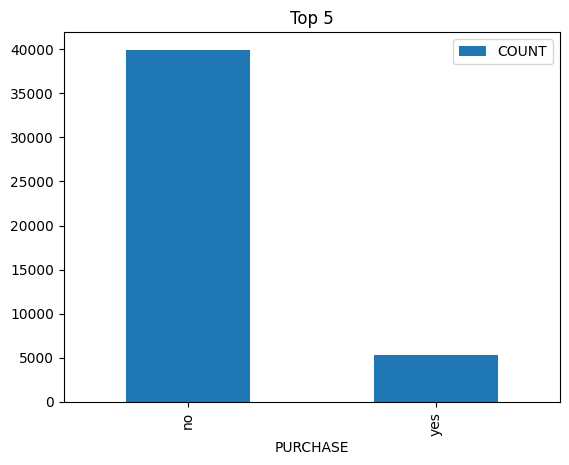

In [10]:
%matplotlib inline 
df_col_frequency.plot.bar(x = 'PURCHASE', y = 'COUNT', title = 'Top ' + str(top_n));

Compare contacts who did purchase with those who didn't by the balance in their account

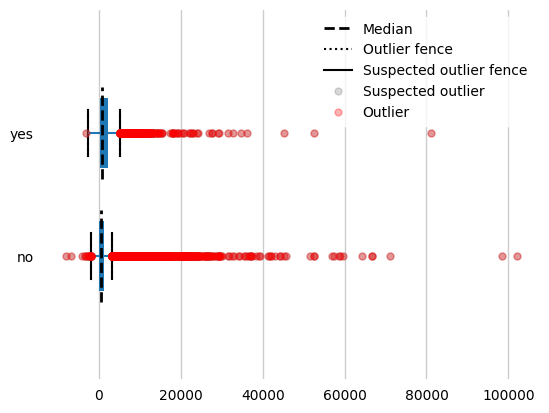

In [11]:
import matplotlib.pyplot as plt
from hana_ml.visualizers.eda import EDAVisualizer
f = plt.figure()
ax1 = f.add_subplot(111) # 111 refers to 1x1 grid, 1st subplot
eda = EDAVisualizer(ax1)
ax, cont = eda.box_plot(data = df_remote, column = 'BALANCE', groupby = 'PURCHASE', outliers = True)